<font size=6>DBSCAN Clustering</font><br>
<font size=5>Autor: <font color="#2890f9"> William Felipe Mendez Ardila <br></font>
<font size=3>GitHub: <font color="#A371F7"> @WilliamMendez <br></font>
<font size=3>Cuenta uniandes: <font color="#FFF200"> w.mendez</font>

importamos las librerías necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import silhouette_score, silhouette_samples

In [2]:
dataRaw = pd.read_csv('data/data_procesada.csv' ,sep=';')

In [3]:
dataRaw.dtypes

No.                                  int64
NIT                                  int64
RAZON SOCIAL                        object
SUPERVISOR                           int64
REGIÓN                               int64
DEPARTAMENTO DOMICILIO               int64
CIUDAD DOMICILIO                     int64
CIIU                                 int64
MACROSECTOR                          int64
INGRESOS OPERACIONALES\r\n2018*    float64
GANANCIA (PERDIDA) 2018            float64
TOTAL ACTIVOS 2018                 float64
TOTAL PASIVOS 2018                 float64
TOTAL PATRIMONIO 2018              float64
INGRESOS OPERACIONALES\r\n2017*    float64
GANANCIA (PERDIDA) 2017            float64
TOTAL ACTIVOS 2017                 float64
TOTAL PASIVOS 2017                 float64
TOTAL PATRIMONIO 2017              float64
GRUPO EN NIIF                        int64
dtype: object

In [4]:
data = dataRaw.select_dtypes(include=[np.number]).drop(['No.'], axis=1).drop(['NIT'], axis=1)

In [5]:
data.head()

,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES\r\n2018*,GANANCIA (PERDIDA) 2018,TOTAL ACTIVOS 2018,TOTAL PASIVOS 2018,TOTAL PATRIMONIO 2018,INGRESOS OPERACIONALES\r\n2017*,GANANCIA (PERDIDA) 2017,TOTAL ACTIVOS 2017,TOTAL PASIVOS 2017,TOTAL PATRIMONIO 2017,GRUPO EN NIIF
0,3,1,2,7,71,4,3.571775e+09,-5.872548e+07,2.956848e+09,2.476739e+09,4.801089e+08,4.005049e+09,-8.752900e+07,2.875460e+09,2.341172e+09,5.342871e+08,0
1,3,3,14,62,99,1,6.018902e+09,3.504944e+07,1.207011e+09,1.031424e+09,1.755873e+08,4.994552e+09,1.083777e+07,1.020832e+09,8.949865e+08,1.258455e+08,0
2,3,4,24,12,90,3,1.739284e+09,1.735105e+07,3.030767e+09,2.163544e+09,8.672231e+08,1.039942e+09,-3.877247e+07,2.615650e+09,1.748991e+09,8.666590e+08,0
3,1,3,10,46,181,6,4.033887e+10,-3.016582e+10,9.908133e+09,4.950861e+10,-3.960047e+10,3.696528e+10,-1.086227e+10,9.807867e+09,1.924663e+10,-9.438767e+09,1
4,3,2,17,22,61,4,1.419514e+09,4.582130e+06,1.498588e+09,4.971313e+08,1.001457e+09,1.360935e+09,3.250460e+07,1.509246e+09,4.902009e+08,1.019045e+09,1


In [6]:
data.isnull().mean()

SUPERVISOR                         0.0
REGIÓN                             0.0
DEPARTAMENTO DOMICILIO             0.0
CIUDAD DOMICILIO                   0.0
CIIU                               0.0
MACROSECTOR                        0.0
INGRESOS OPERACIONALES\r\n2018*    0.0
GANANCIA (PERDIDA) 2018            0.0
TOTAL ACTIVOS 2018                 0.0
TOTAL PASIVOS 2018                 0.0
TOTAL PATRIMONIO 2018              0.0
INGRESOS OPERACIONALES\r\n2017*    0.0
GANANCIA (PERDIDA) 2017            0.0
TOTAL ACTIVOS 2017                 0.0
TOTAL PASIVOS 2017                 0.0
TOTAL PATRIMONIO 2017              0.0
GRUPO EN NIIF                      0.0
dtype: float64

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(data)
X = pd.DataFrame(X)

normalizer = Normalizer()
X = normalizer.fit_transform(X)
X = pd.DataFrame(X)

X.columns = data.columns
X.describe()

,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES\r\n2018*,GANANCIA (PERDIDA) 2018,TOTAL ACTIVOS 2018,TOTAL PASIVOS 2018,TOTAL PATRIMONIO 2018,INGRESOS OPERACIONALES\r\n2017*,GANANCIA (PERDIDA) 2017,TOTAL ACTIVOS 2017,TOTAL PASIVOS 2017,TOTAL PATRIMONIO 2017,GRUPO EN NIIF
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,0.074728,-0.060159,-0.061615,-0.057770,-0.031307,-0.033006,-0.052114,-0.022627,-0.048154,-0.051558,-0.012699,-0.052839,0.004703,-0.046621,-0.046746,-0.038376,-0.054357
std,0.217728,0.347564,0.336336,0.372321,0.384540,0.410498,0.101074,0.104056,0.094908,0.092023,0.032429,0.104759,0.099808,0.092741,0.082876,0.114992,0.370228
min,-0.948579,-0.720619,-0.470895,-0.572993,-0.767565,-0.746128,-0.182918,-0.762327,-0.174251,-0.177640,-0.027453,-0.213260,-0.874116,-0.170720,-0.161440,-0.305153,-0.484162
25%,0.094699,-0.239522,-0.274381,-0.338707,-0.374683,-0.444352,-0.099523,-0.058941,-0.097826,-0.098458,-0.017400,-0.103219,-0.009663,-0.093455,-0.088086,-0.087127,-0.300702
50%,0.125259,-0.180218,-0.213836,-0.202891,0.054936,0.105112,-0.075282,-0.042249,-0.073582,-0.075765,-0.013537,-0.077145,-0.004410,-0.071867,-0.068143,-0.067068,-0.223034
75%,0.161345,0.140215,0.054602,0.232219,0.239880,0.223479,-0.044926,-0.025228,-0.041355,-0.043601,-0.010244,-0.045930,0.006631,-0.039589,-0.036284,-0.039018,-0.046638
max,0.578655,0.926632,0.883244,0.900403,0.705657,0.731034,0.648249,0.803959,0.463567,0.538082,0.994594,0.648236,0.557973,0.460380,0.536700,0.684670,0.854082


In [8]:
X.isnull().mean()

SUPERVISOR                         0.0
REGIÓN                             0.0
DEPARTAMENTO DOMICILIO             0.0
CIUDAD DOMICILIO                   0.0
CIIU                               0.0
MACROSECTOR                        0.0
INGRESOS OPERACIONALES\r\n2018*    0.0
GANANCIA (PERDIDA) 2018            0.0
TOTAL ACTIVOS 2018                 0.0
TOTAL PASIVOS 2018                 0.0
TOTAL PATRIMONIO 2018              0.0
INGRESOS OPERACIONALES\r\n2017*    0.0
GANANCIA (PERDIDA) 2017            0.0
TOTAL ACTIVOS 2017                 0.0
TOTAL PASIVOS 2017                 0.0
TOTAL PATRIMONIO 2017              0.0
GRUPO EN NIIF                      0.0
dtype: float64

) missing from current font.ng\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.ng\Python\Python38\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


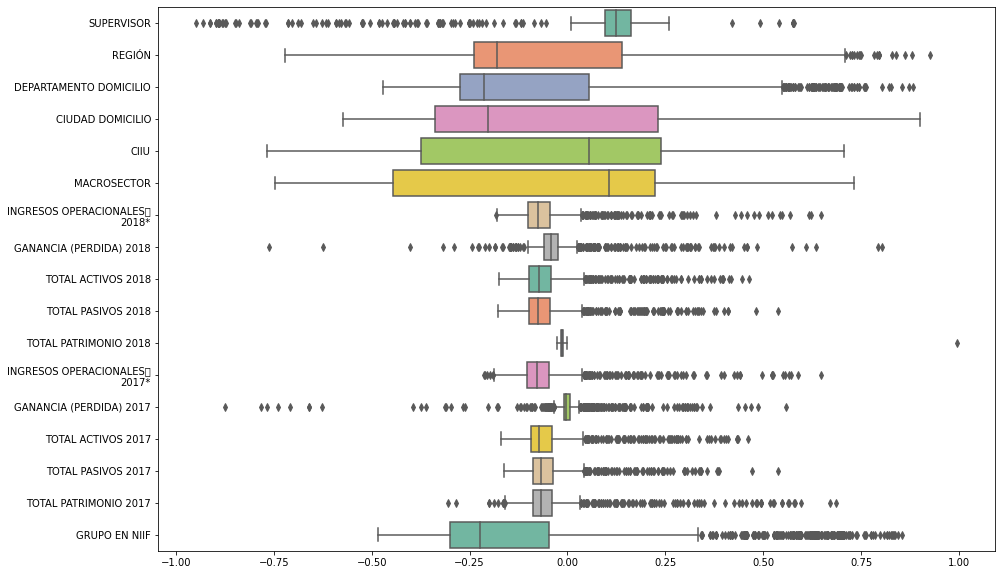

In [9]:
fig = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="h", palette="Set2")

In [10]:

important_features = ['GANANCIA (PERDIDA) 2018' ,'GANANCIA (PERDIDA) 2017', 
                      'TOTAL PASIVOS 2018', 'TOTAL PASIVOS 2017', 
                      'TOTAL ACTIVOS 2018', 'TOTAL ACTIVOS 2017',
                      'TOTAL PATRIMONIO 2018', 'TOTAL PATRIMONIO 2017',
                      'INGRESOS OPERACIONALES\r\n2018*', 'INGRESOS OPERACIONALES\r\n2017*']

# for feature in important_features:
#     X[feature] = np.log(X[feature], where=X[feature]>0)

In [11]:
X.isnull().mean()

SUPERVISOR                         0.0
REGIÓN                             0.0
DEPARTAMENTO DOMICILIO             0.0
CIUDAD DOMICILIO                   0.0
CIIU                               0.0
MACROSECTOR                        0.0
INGRESOS OPERACIONALES\r\n2018*    0.0
GANANCIA (PERDIDA) 2018            0.0
TOTAL ACTIVOS 2018                 0.0
TOTAL PASIVOS 2018                 0.0
TOTAL PATRIMONIO 2018              0.0
INGRESOS OPERACIONALES\r\n2017*    0.0
GANANCIA (PERDIDA) 2017            0.0
TOTAL ACTIVOS 2017                 0.0
TOTAL PASIVOS 2017                 0.0
TOTAL PATRIMONIO 2017              0.0
GRUPO EN NIIF                      0.0
dtype: float64

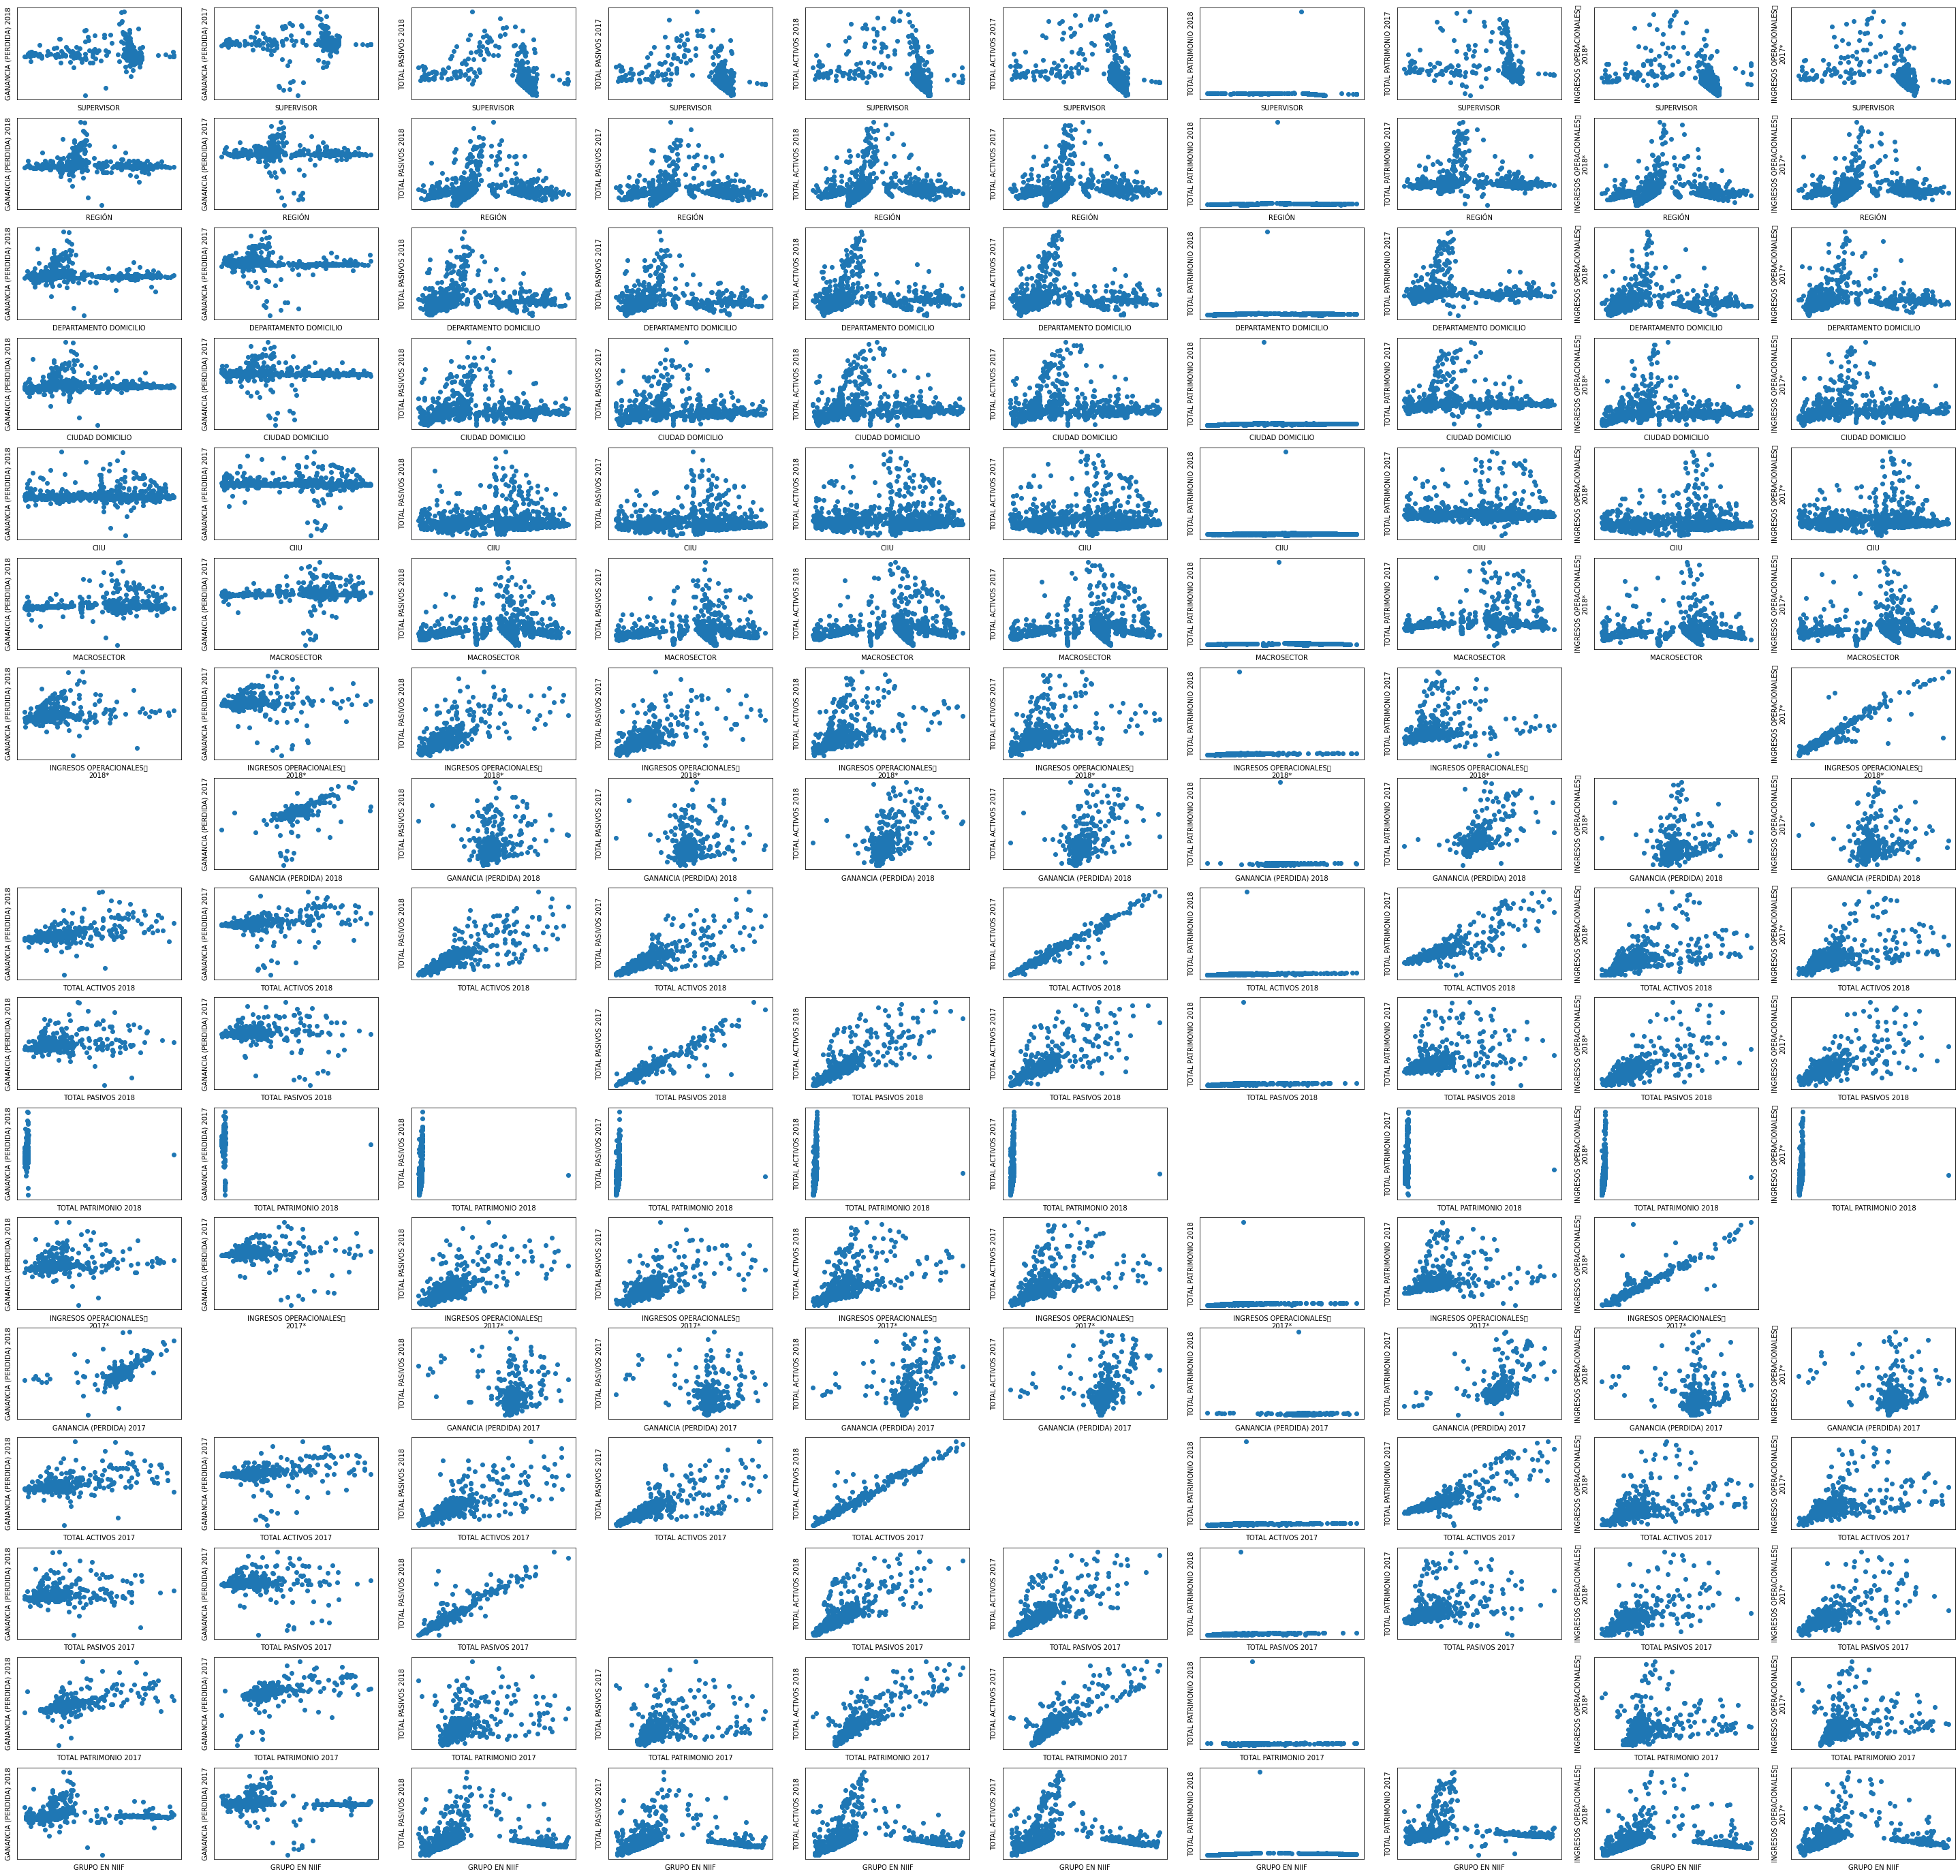

In [12]:
columns = data.columns.tolist()

# show every combination of features

fig, axes = plt.subplots(len(columns), len(important_features) , figsize=(len(columns)*3, len(important_features)*5))

for j in range(len(important_features)):
    for i in range(len(columns)):
        if columns[i] != important_features[j]:
            axes[i, j].scatter(X[columns[i]], X[important_features[j]])
            axes[i, j].set_xlabel(columns[i])
            axes[i, j].set_ylabel(important_features[j])
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])
        else:
            axes[i, j].set_visible(False)
            

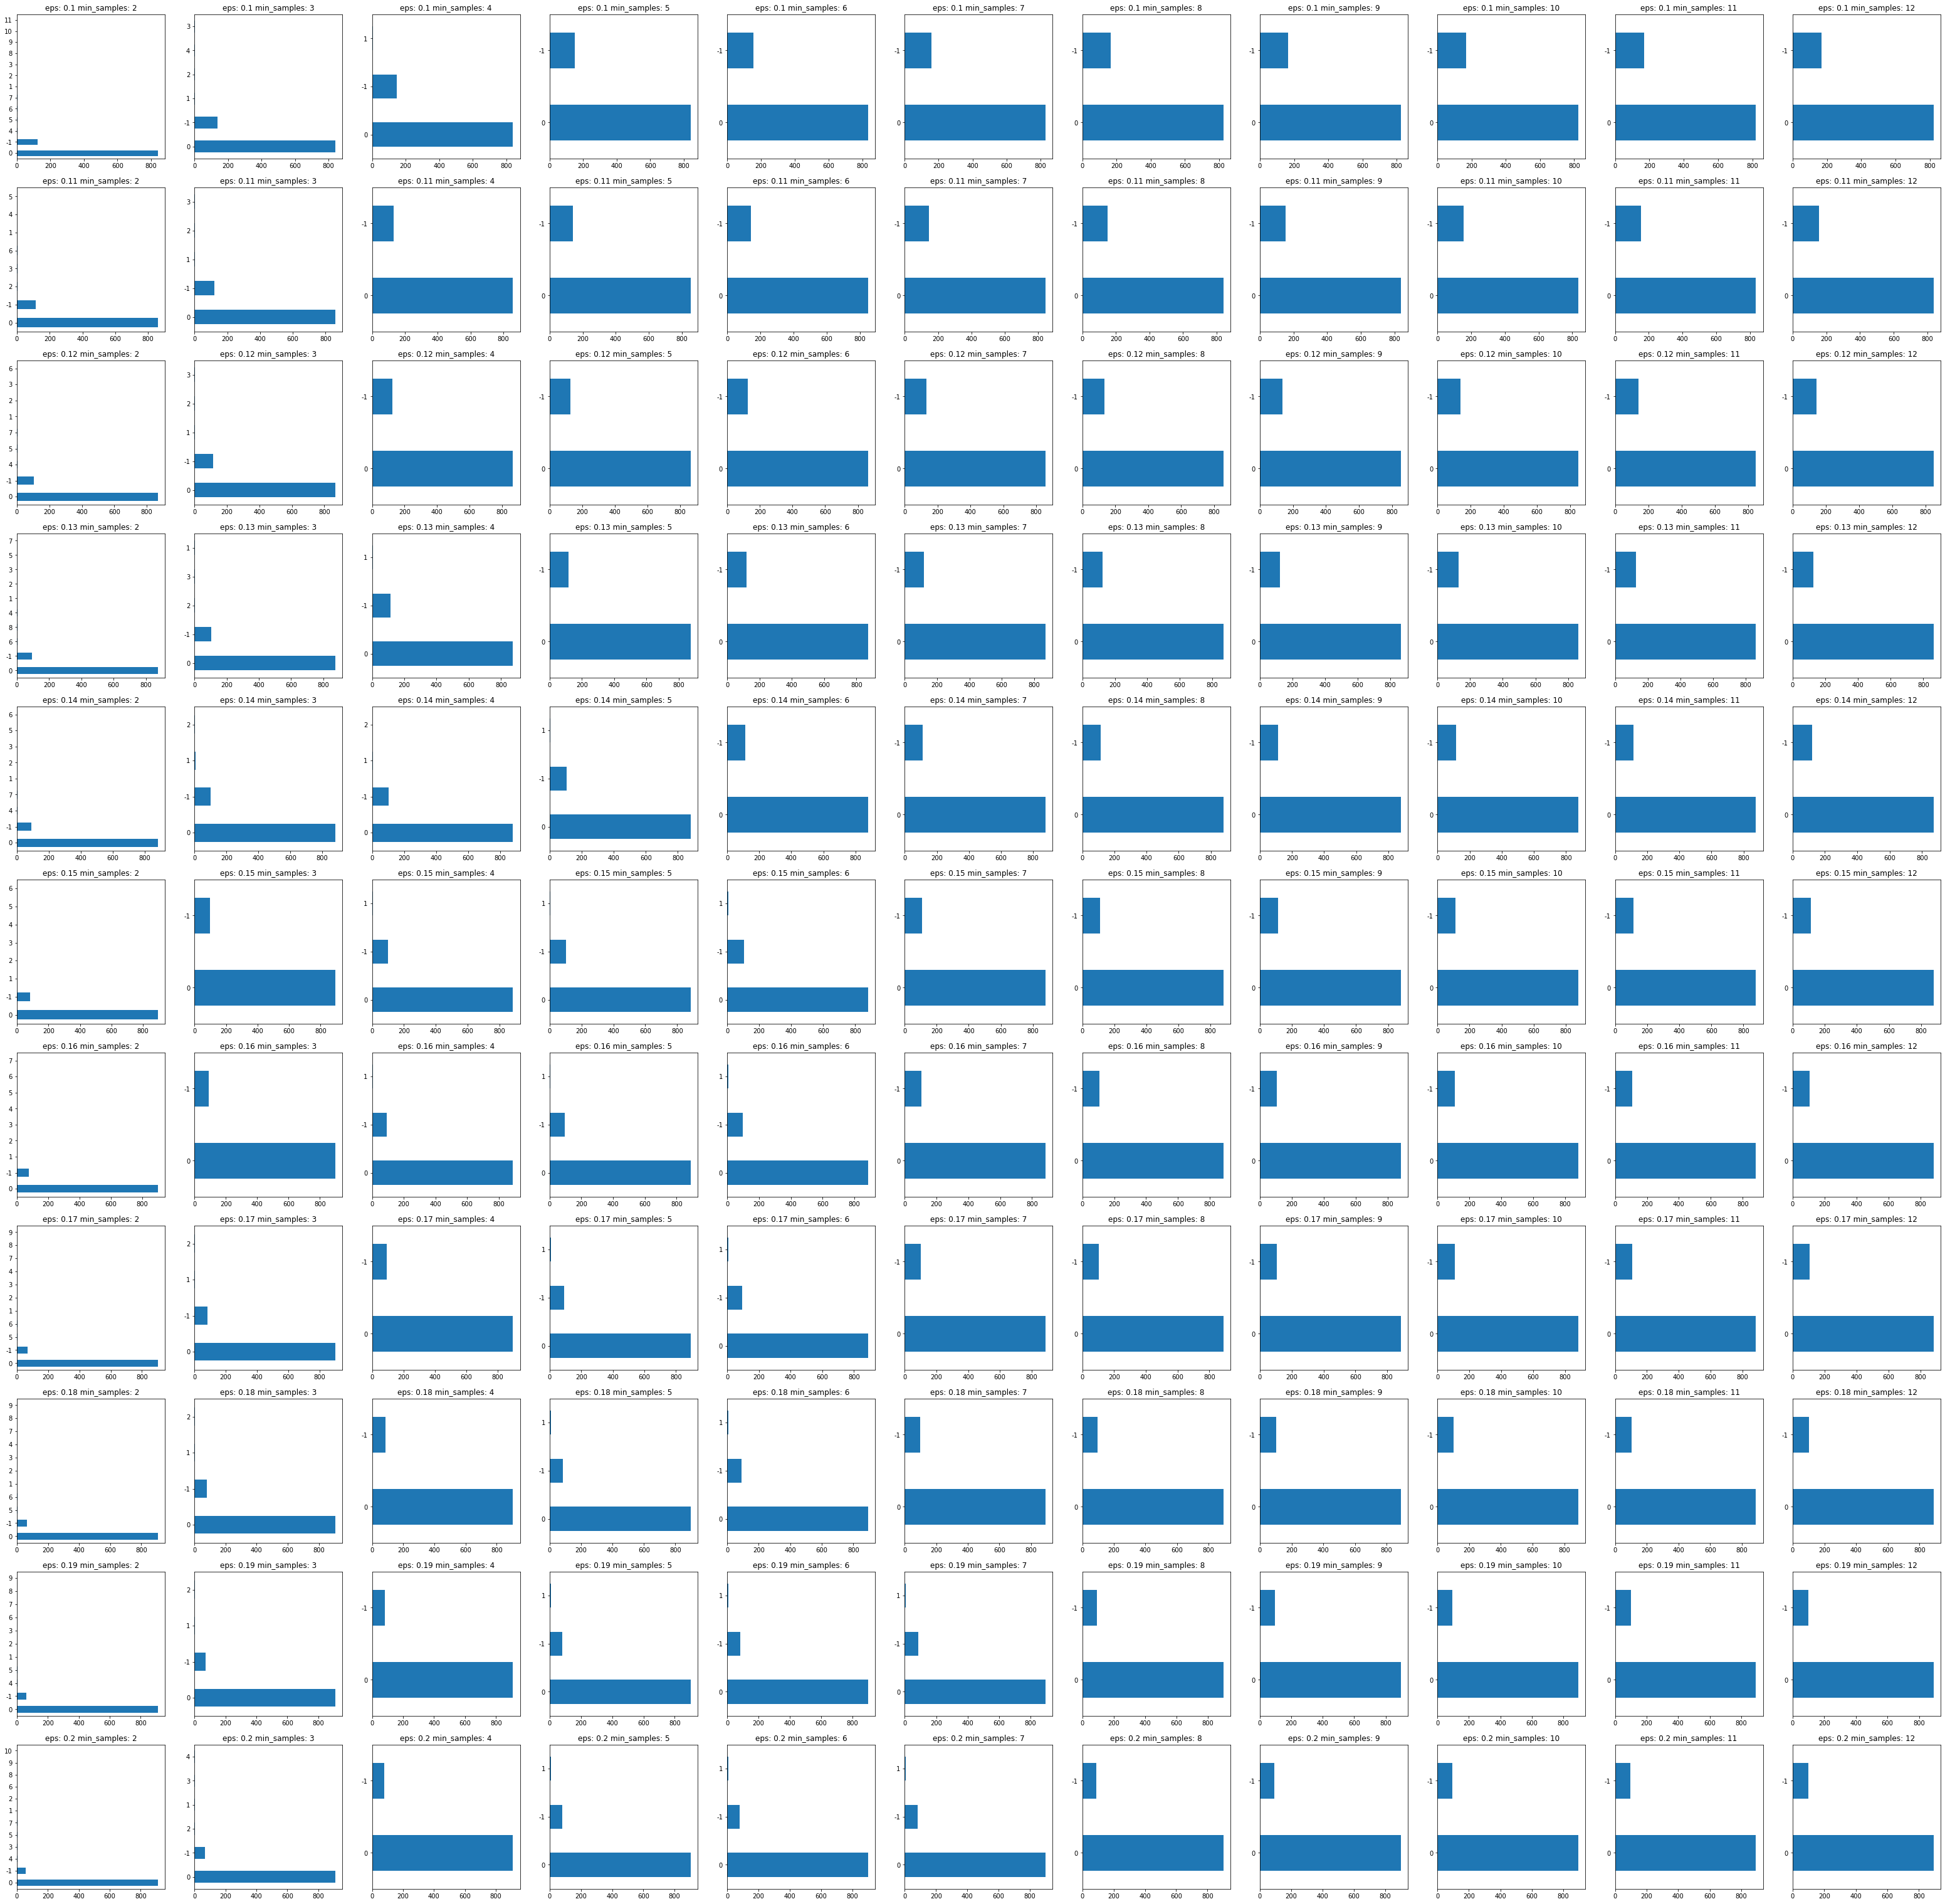

In [13]:
epsilons = [0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2]
min_samples = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
# min_samples = ['auto', 'ball_tree', 'kd_tree', 'brute']

fig, axes = plt.subplots(len(epsilons), len(min_samples) , figsize=(len(epsilons)*5, len(min_samples)*5))
for epsilon in range(len(epsilons)):
    for sample in range(len(min_samples)):
        model = DBSCAN(eps=epsilons[epsilon], min_samples=min_samples[sample])
        # model.fit_predict(X[['INGRESOS OPERACIONALES\r\n2018*', 'TOTAL ACTIVOS 2017', 'TOTAL PATRIMONIO 2017']])
        model.fit_predict(X[important_features])
        X['CLUSTER'] = model.labels_
        axes[epsilon, sample]= X['CLUSTER'].value_counts().plot.barh(ax=axes[epsilon, sample])
        axes[epsilon, sample].set_title('eps: ' + str(epsilons[epsilon]) + ' min_samples: ' + str(min_samples[sample]))
plt.show()

        # model = DBSCAN(eps=epsilon, min_samples=sample)
        # model.fit_predict(X[important_features])
        # X['cluster'] = model.labels_
        
    
        # X['cluster'].value_counts().sort_values().plot.barh()
        
# modelo = DBSCAN(eps=0.5, min_samples=5, metric = 'cosine')
# modelo.fit_predict(X[important_features])
# X['CLUSTER'] = modelo.labels_
# X['CLUSTER'].value_counts().plot(kind='bar')

<AxesSubplot:>

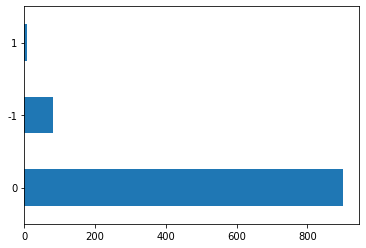

In [14]:
modelo = DBSCAN(eps=0.2, min_samples=6)
modelo.fit_predict(X[important_features])
X['CLUSTER'] = modelo.labels_
X['CLUSTER'].value_counts().plot(kind='barh')

For n_clusters = 6 , the average silhouette score is : 0.7221502153285979


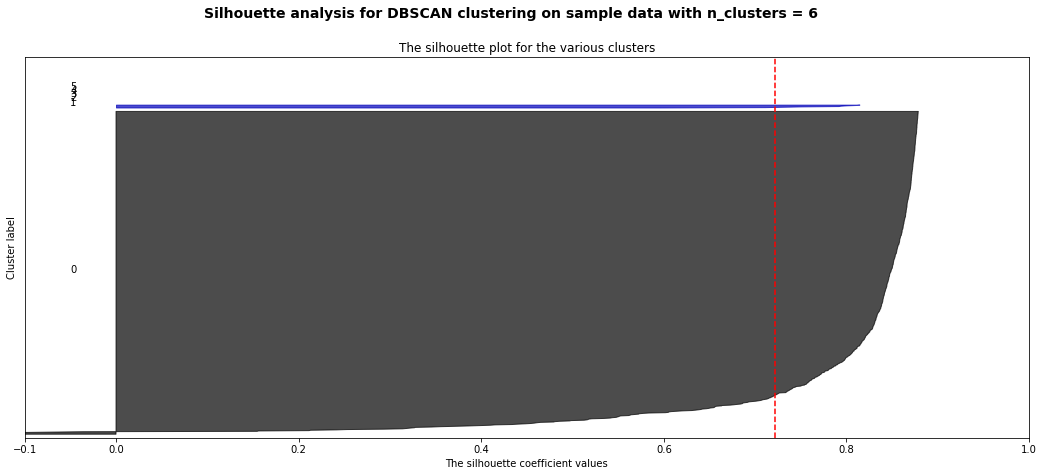

In [22]:
def plot_silhouette(X, nSam, random_state = 0):
    for n in nSam:
        kmeans_ = DBSCAN(eps=0.2, min_samples=n)
        preds_ = kmeans_.fit_predict(X)

        # Se calcula el coeficiente de silueta general
        silhouette_avg = silhouette_score(X, preds_)
        print('For n_clusters =', n, ', the average silhouette score is :', silhouette_avg )

        # Se calcula el coeficiente de silueta para cada instancia
        sample_silhouette_values = silhouette_samples(X, preds_)

        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n + 1) * 10])

        y_lower = 10
        for i in range(n):
            ith_cluster_silhouette_values = sample_silhouette_values[preds_ == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor = color, edgecolor = color, alpha = 0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title('The silhouette plot for the various clusters')
        ax1.set_xlabel('The silhouette coefficient values')
        ax1.set_ylabel('Cluster label')
        ax1.axvline(x=silhouette_avg, color = 'red', linestyle = '--')
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # colors = cm.nipy_spectral(preds_.astype(float) / n)
        # ax2.scatter(X[:, 0], X[:, 1], marker = '.', s = 30, lw = 0, alpha = 0.7, c = colors, edgecolor = 'k')

        # centers = kmeans_.cluster_centers_
        # ax2.scatter(centers[:, 0], centers[:, 1], marker = 'o', c = 'white', alpha = 1, s = 200, edgecolor = 'k')

        # for i, c in enumerate(centers):
        #     ax2.scatter(c[0], c[1], marker = '$%d$' % i, alpha = 1, s = 50, edgecolor = 'k')

        # ax2.set_title('The visualization of the clustered data')
        # ax2.set_xlabel('Feature space for the 1st feature')
        # ax2.set_ylabel('Feature space for the 2nd feature')

        plt.suptitle('Silhouette analysis for DBSCAN clustering on sample data with n_clusters = %d' % n, fontsize = 14, fontweight = 'bold')

    plt.show()
    
plot_silhouette(X[important_features], [6])

) missing from current font.\Programs\Python\Python38\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from current font.\Programs\Python\Python38\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from current font.ng\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 13 (
  func(*args, **kwargs)


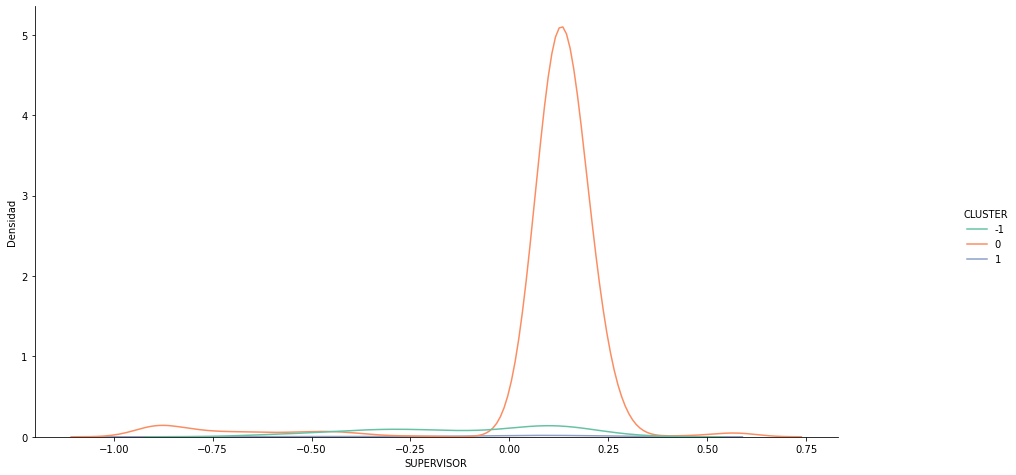

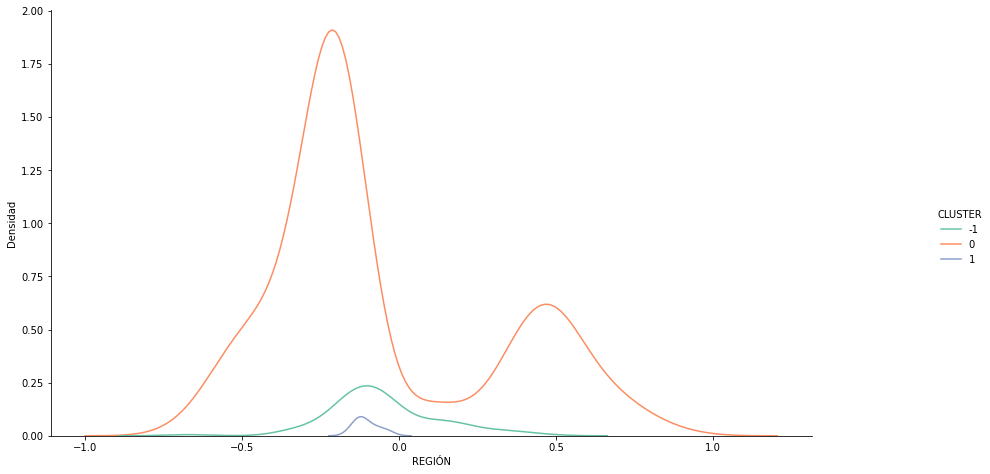

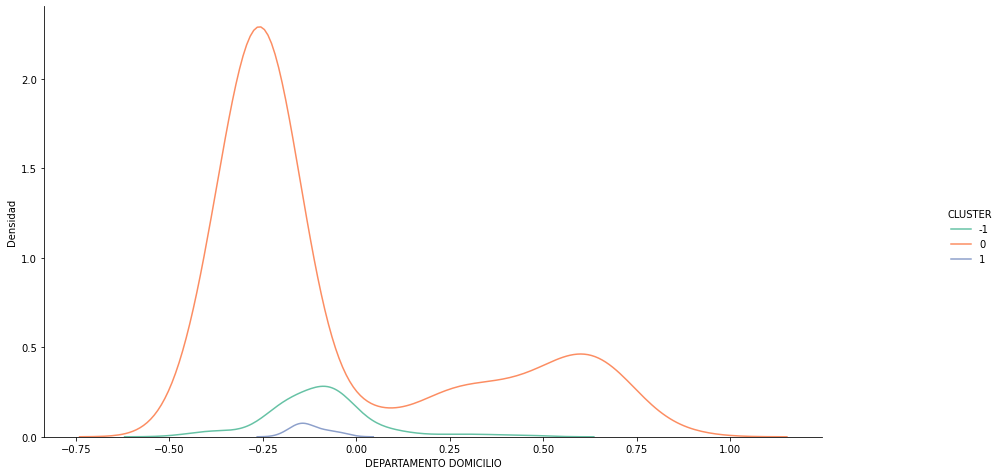

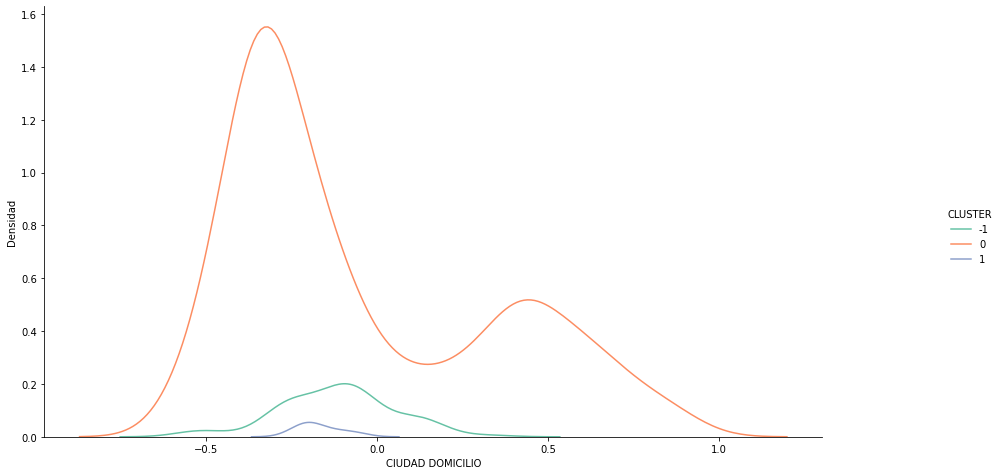

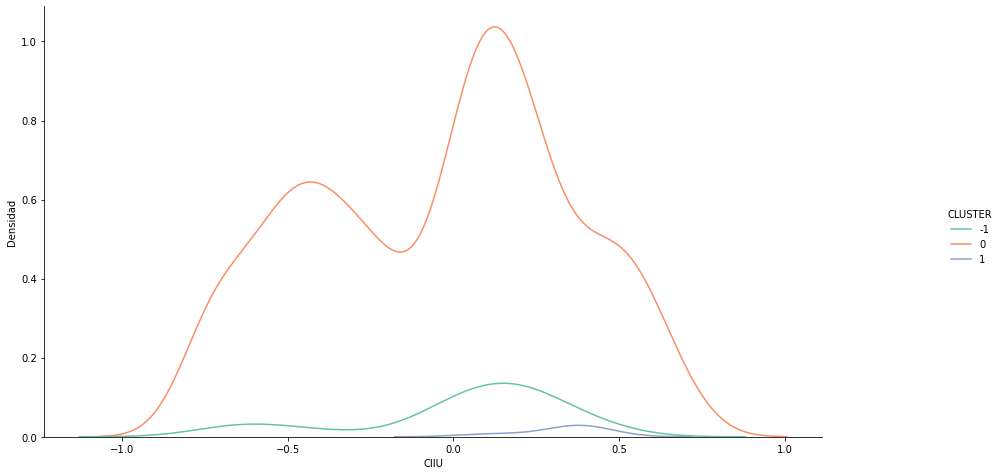

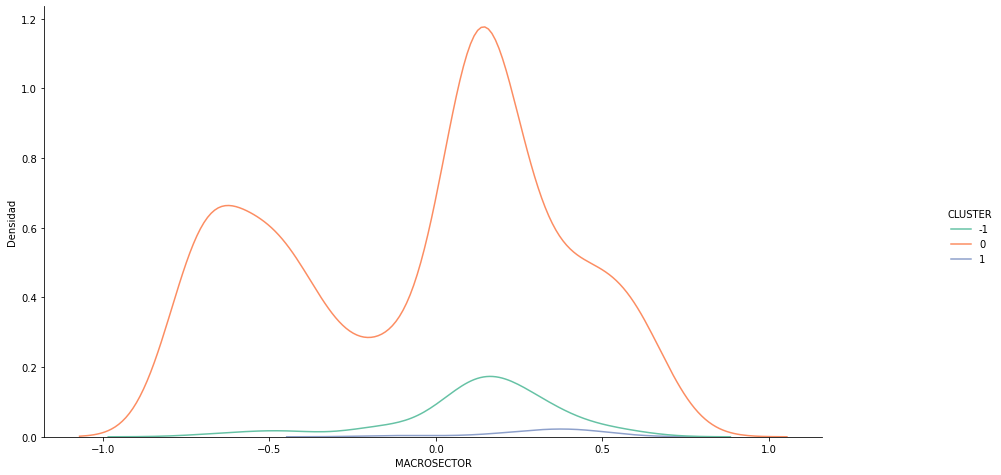

) missing from current font.ng\Python\Python38\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


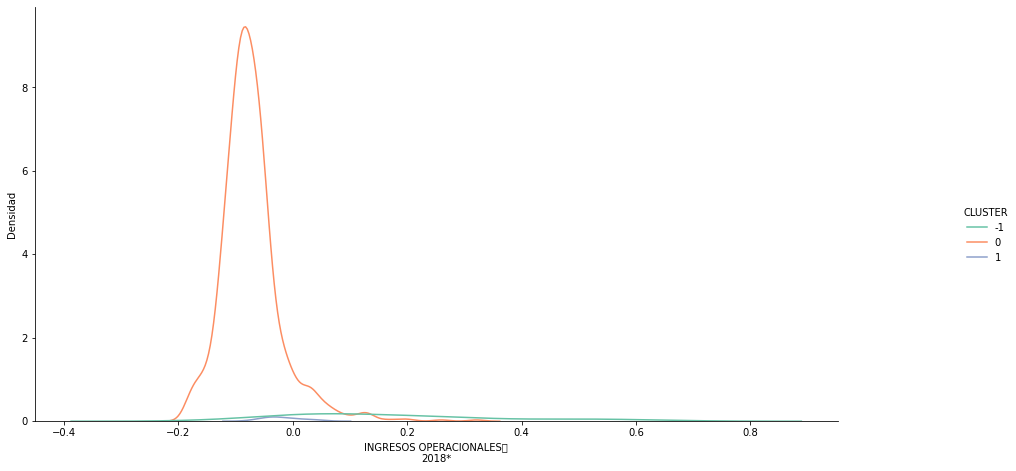

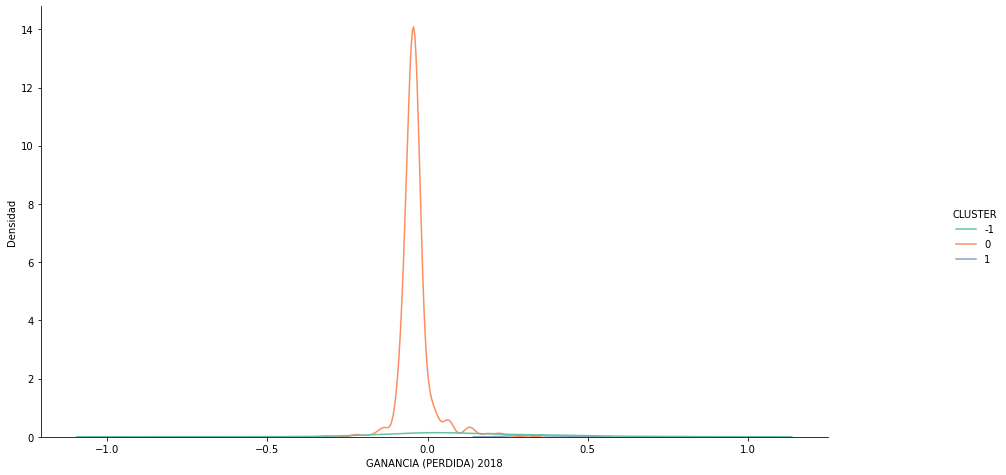

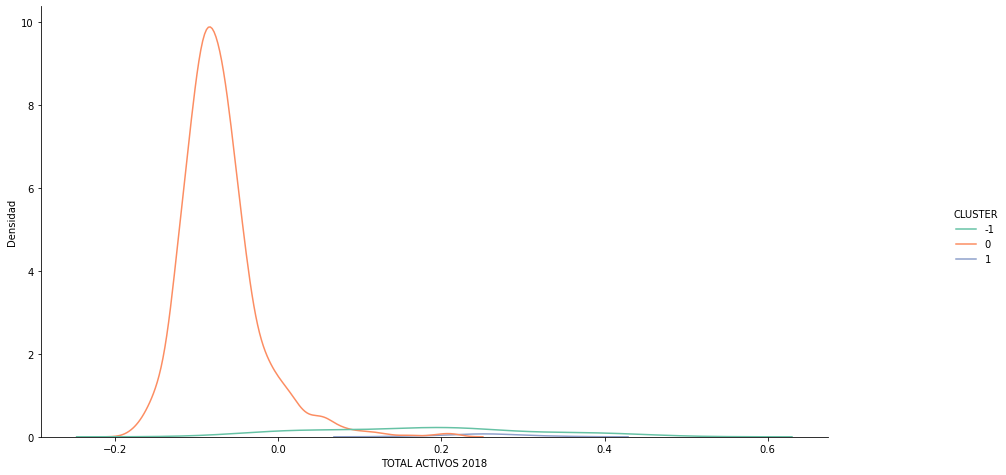

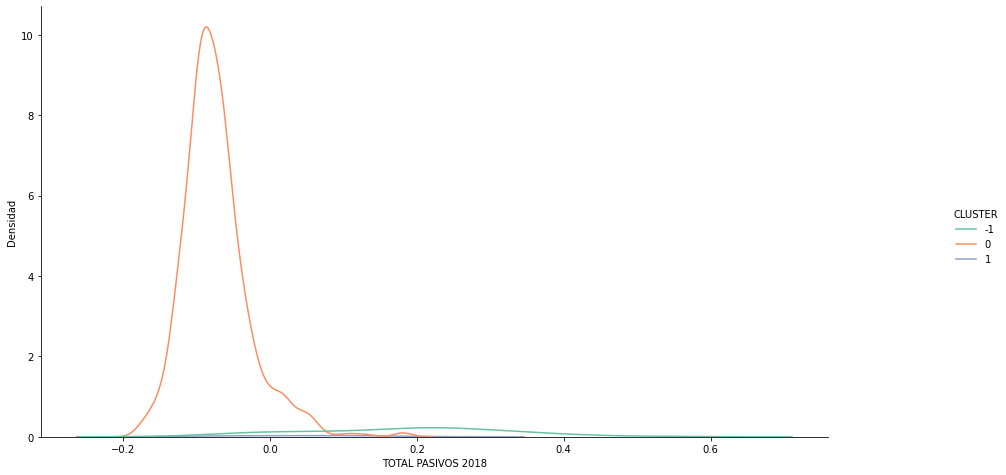

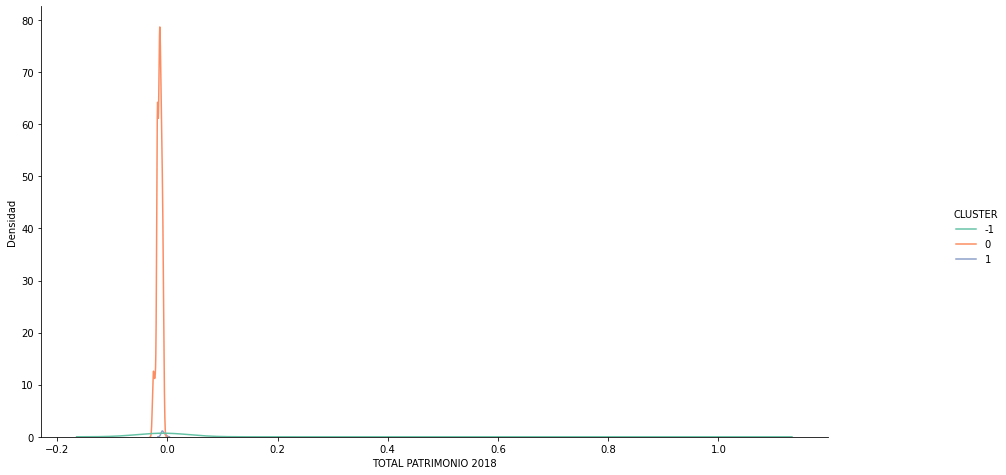

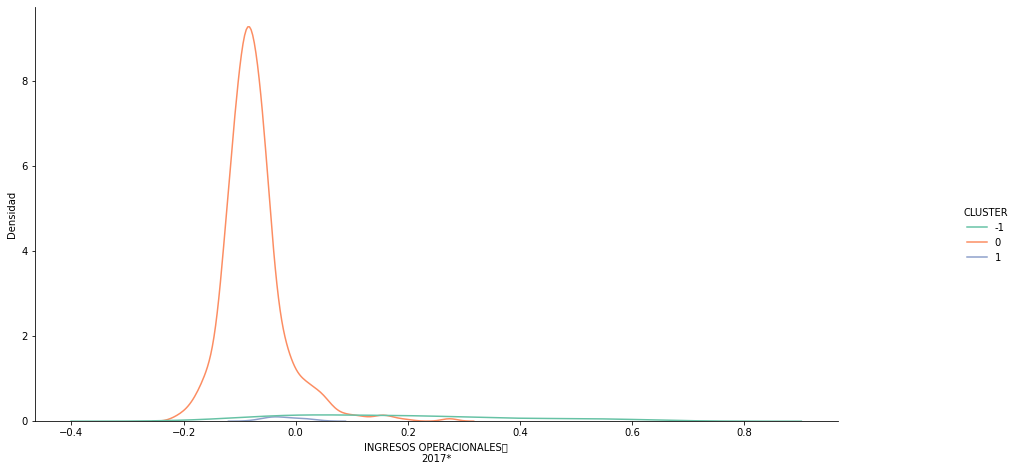

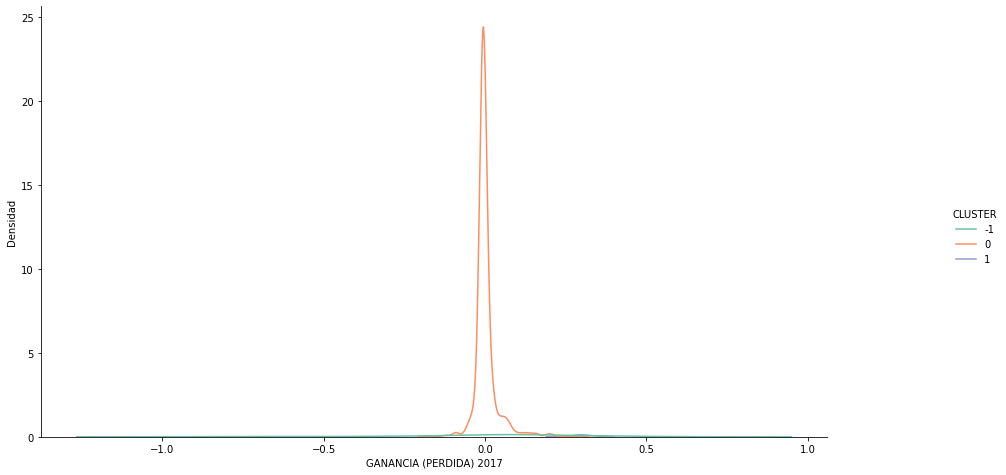

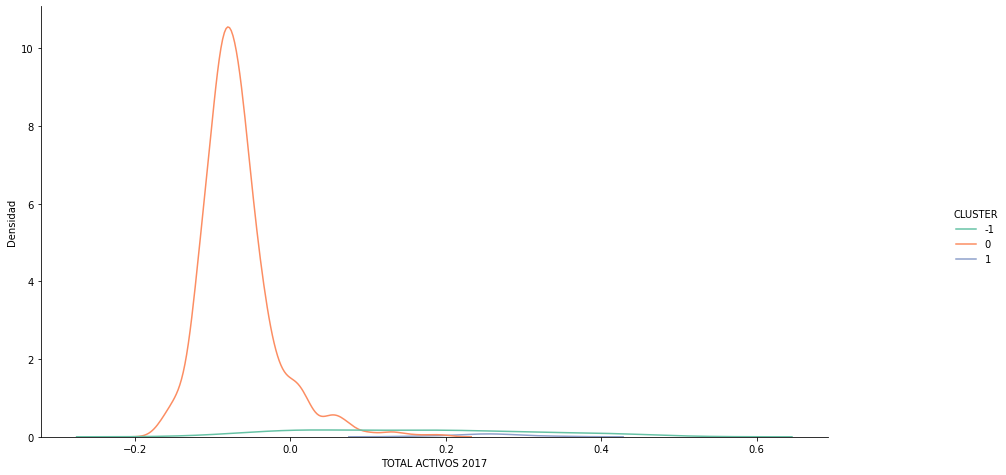

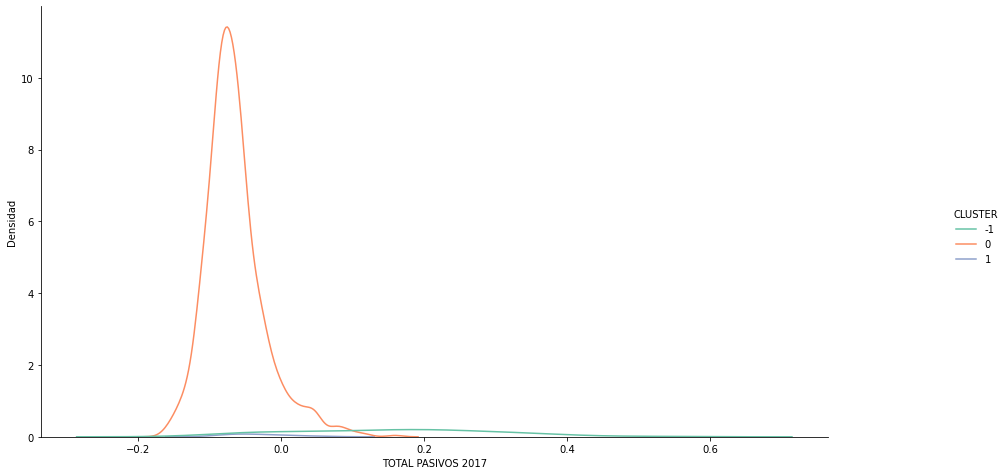

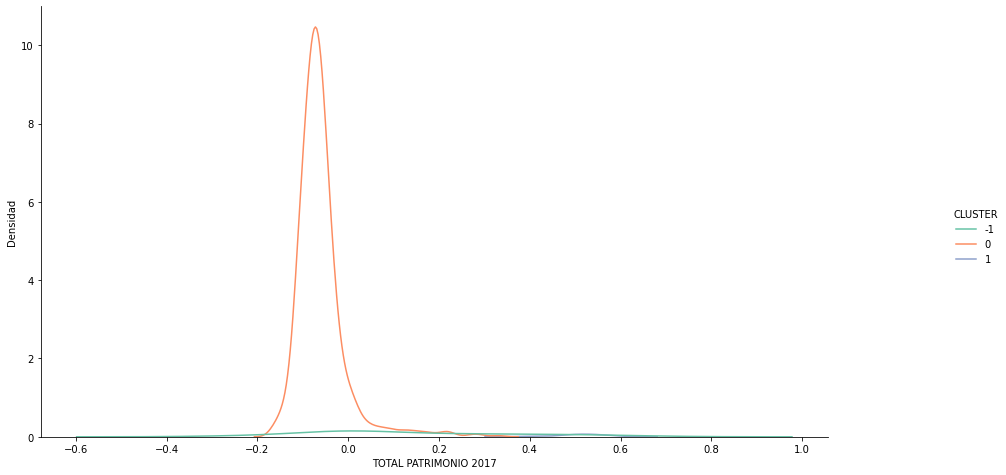

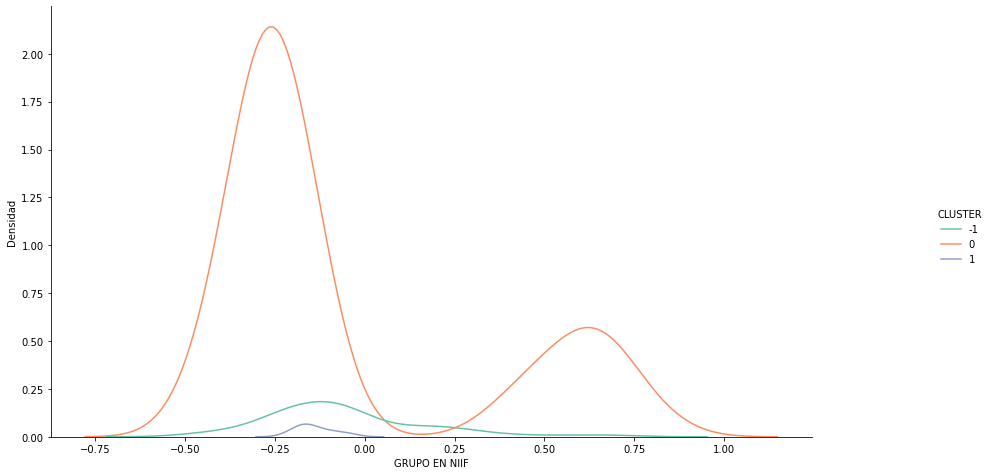

In [23]:
for i in range(len(columns)):
    g = sns.displot(X, x=columns[i], hue='CLUSTER', kind='kde', palette='Set2')
    g.set(xlabel=columns[i], ylabel='Densidad')
    g.fig.set_size_inches(15, 7)
    #   g = sns.displot(df_tracks, x = 'popularity', hue = 'kmeans', kind = 'kde', palette = 'tab10')
        
    